In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
data=pd.read_csv("Iris.csv")

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()

In [ ]:
data['Species']=model.fit_transform(data['Species'])

In [ ]:
data['Species'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64>

In [ ]:
columns=data.columns

In [ ]:
columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
X=data.iloc[:,0:5]
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [ ]:
y=data['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [ ]:
data['Species'].dtype

dtype('int64')

In [ ]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


In [ ]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [ ]:
data['Species'].unique()

array([0, 1, 2])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=60)

In [ ]:
#Building our Decision tree
model1=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.6, 0.8333333333333334, 'x[0] <= 100.5\nentropy = 1.582\nsamples = 120\nvalue = [37, 40, 43]'),
 Text(0.4, 0.5, 'x[3] <= 2.45\nentropy = 0.999\nsamples = 77\nvalue = [37, 40, 0]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

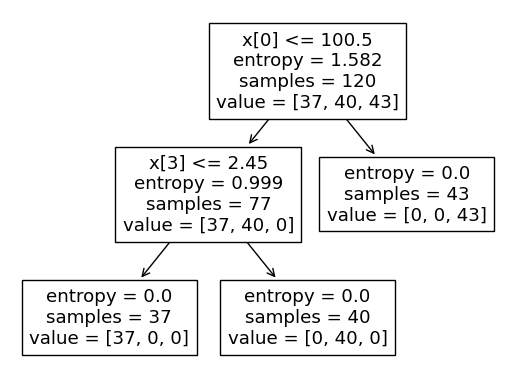

In [ ]:
#Plotting the decision tree
from sklearn import tree
tree.plot_tree(model1)

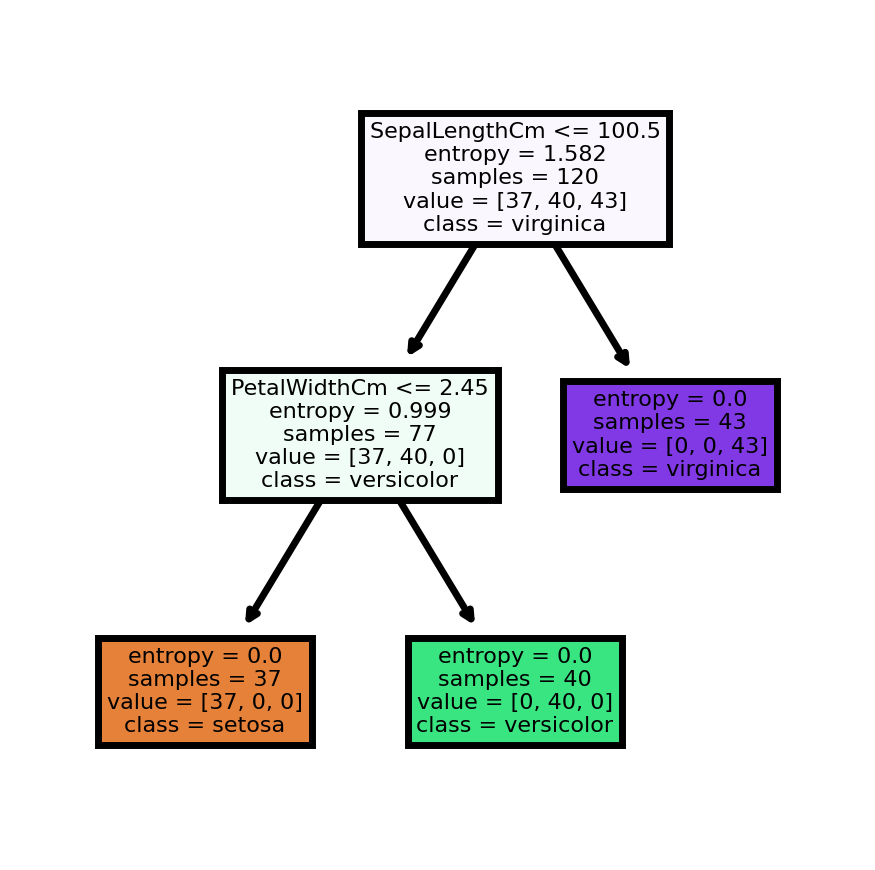

In [ ]:
from matplotlib.pyplot import subplots
fn=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'] # Columns
cn=['setosa','versicolor','virginica'] # value_count_uniques
fig,axes =subplots(nrows=1,ncols=1,figsize=(2,2),dpi=500)
tree.plot_tree(model1,feature_names=fn,class_names=cn,filled=True);

In [ ]:
# Predicting on test data
preds=model1.predict(X_test)


In [ ]:
preds

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
pd.Series(preds).value_counts()

0    13
1    10
2     7
dtype: int64

In [ ]:
y_test.value_counts()

0    13
1    10
2     7
Name: Species, dtype: int64

In [ ]:
preds

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
# Confusion matrix
pd.crosstab(y_test,preds)  # Comparing the actual and predicted values to find the misclassifiactions

col_0,0,1,2
Species,,,
0,13,0,0
1,0,10,0
2,0,0,7


In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds)

1.0